## Notas:


KNNeighbour sente os valores de modo hierarquico. Um item com valor 2 está mais perto do 1 que do que tem valor 0. Ele agrupará segundo esta ordem.

* ### **Análise 1:**
Não achei correlação entre dados.
Regressão Linear não é possível porque não existe correlação entre dados. Regressão é usada para resultados continuos, então regressão está fora da jogada. A solução é classificação. Vou me ater a 3: K-Means, Naive Bayes e 


* ### **Análise 2:**
Classificação como Caracterização de um elemento.
Caracterização entendido como  resumir uma residência pelos seus atributos. Talvez reunir um conjunto de atribuitos que expressem uma diferenciação entre apartamentos. Mas isso tem que ser sem supervisão. Clusterização seria melhorada por uma eurística de seleção de atributos para ampliar essa separação entre classes = discriminação ou caracterização melhor das residências.

Método: Clusterização Kmeans.


* ### **Análise 3:**
Classificação como Discriminação de um elemento. Dados um ou mais rótulos (duas ou mais classes), discriminar a edificação considerando os atributos que possui vs aquele rótulo dado. Ex: dado que o usuário votou em determinados pontos, ele faria a reforma de seu apto? Provavelmente teremos pouca acurácia porque os dados não possuem forte correlação. Verificar isso no resultado.

   Método: Classificacao Linear de duas classes ou multiclass.

Problema: ainda falta algoritmo de classificação linear e polinomial

Problema: Erro no classificador antigo (na marra)

Problema: Dificuldade em plotar resultados em 3d.

Problema: Plotar com cores dos rótulos e com nome dos índices

Problema: Como medir a qualidade dos classificadores e da regressão? Acurácia para Classificador. Erro quadratico na regressao linear? Qual o código para isso? Posso usar os que já tenho nos códigos anteriores?


* ### **Análise 4:**
Qual o impacto do PCA e da Normalização nestas análises? O que muda? (este eu consigo fazer bem, não tive problemas antes)

* ### **Análise 5, Discussão:**
Como melhorar estas análises? O que deveria mudar no método de coleta de dados ou na apresentação dos dados? Deveria usar outro algoritmo de ML?
Discussão textual.



##DADOS

In [0]:
import random

import numpy as np
from numpy.linalg import inv

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd

import seaborn as sns
import seaborn as sns; sns.set(style="ticks", color_codes=True)

from sklearn.decomposition import PCA
from sklearn import linear_model, model_selection, datasets
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error



from scipy.special import expit

%matplotlib inline
#%config InlineBackend.figure_format='svg'

In [0]:
url = 'https://github.com/dglopes/dglopes.github.io/raw/master/APO_csv8.csv'
#url = 'https://github.com/dglopes/dglopes.github.io/raw/master/APO_csv7.csv' #ANTIGA PLANILHA USADA PARA CRIAR OS CÓDIGOS.

colunas = ['Conjunto','Quadra', 'Bloco','Andar', 'Orientacao', 'Anos_resid', 'Idade', 'Sexo',
           'Escol', 'Npessoas', 'NCriancas', 'NAdultos', 'PD', 'Deficiencia','Satisf_barulhoQ',
           'Sensacao_barulho', 'Barulho_principal', 'Barulho_principal_noite', 'Satisf_tempQ',
           'Sensacao_temp', 'Satisf_locomov', 'Transp_princip', 'Satisfacao_acess', 'Satisf_usoacess',
           'Satisf_materiais', 'Reformado', 'Satisf_agua', 'Opiniao_agua', 'Valor_conta', 'Imp_vent',
           'Imp_silen','Imp_conta', 'Imp_mat',	'Imp_acess']

dados = pd.read_csv(url, names= colunas, header=1)
#dados.head(10)

SELEÇÃO DOS DADOS:

In [0]:
A = dados['Valor_conta'] #usualmente será atributo
R = dados['Opiniao_agua'] #Nas classificações será Rótulo, convertido para binário com get_dummies

## Análise inicial do dataset

In [0]:
shape = dados.shape
print("Exibindo dados da amostra")
print("Quantidade de linhas = ",shape[0])
print("Quantidade de colunas = ",shape[1])

print("\n")
print("Resumo estatístico dos dados")
print(dados.describe())

In [0]:
print("\n")
print("Graficando os dados")

dados.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

In [0]:
print("\n")
print("Graficando os dados em 2d")
plt.figure(1)
plt.scatter(A, R)
#plt.bar(A, R)

plt.xlabel('1o Atrib')
plt.ylabel('2o Atrib')
plt.title('GRAFICO')
plt.tight_layout()
plt.show()

### Seaborn pairplot

In [0]:
df_g = pd.read_csv(url)
 
# Basic correlogram
sns.pairplot(df_g)
plt.show()


###Análise de Correlação

In [0]:
#Normalizacao
from sklearn.preprocessing import StandardScaler
dados_std = dados.values
dados_std = StandardScaler().fit_transform(dados_std)
pd.DataFrame(data = dados_std, columns = colunas).head()

In [0]:
#para cada atributo, analisar sua correlação com outro atributo. Vizualizar com mapa de calor - heatmap.
correlation_matrix = dados.corr()
#correlation_matrix = dados_norma.corr()

plt.figure(figsize=(20,25))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='coolwarm', cbar_kws={"shrink": .5}, robust=True)

plt.title('Matriz de Correlação entre os atributos', fontsize=20)
plt.xlabel('Numero de Clusters')
plt.ylabel('Distância média entre os pontos de dados e o centróide de seu cluster')
plt.show()

##>>> PREPARAÇÃO DOS DADOS

### Normalização

In [0]:
#Normalizacao
from sklearn.preprocessing import StandardScaler
dados_norma = dados.iloc[:,:].values
dados_norma = StandardScaler().fit_transform(dados_norma)
dados_norma2 = pd.DataFrame(data = dados_norma, columns = colunas).head(10)
dados_norma2.fillna(0)

In [0]:
#np.any(np.isnan(dados_norma2))
#np.all(np.isfinite(dados_norma))
#np.where(~np.isnan(dados_norma), dados_norma, 0)
#new_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

In [0]:
plt.scatter(dados_norma[3], dados_norma[20], c='r', marker = '.')
plt.scatter(dados_norma[3], dados_norma[9], c='k', marker = '.')
plt.scatter(dados_norma[3], dados_norma[33], c='y', marker = '.')
plt.scatter(dados_norma[3], dados_norma[30], c='b', marker = '.')
plt.scatter(dados_norma[3], dados_norma[6], c='g', marker = '.')
plt.xlabel('ANDAR')
plt.ylabel('y')
plt.title('GRAFICO')

plt.show()

###PCA

In [0]:
pca = PCA(n_components=14)
principalComponents = pca.fit_transform(dados_norma2)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'])
print(pca.explained_variance_ratio_)
principalDf.head(8)


In [0]:
print("\n")
print("Graficando os dados em 2d")
plt.figure(1)
plt.scatter(principalComponents[:, 8], principalComponents[:,9])
plt.xlabel('X')
plt.ylabel('y')
plt.title('GRAFICO')
plt.tight_layout()
plt.show()

##>>> TESTE DE REGRESSÕES

###Regressão com onehotencoder <<< PROBLEMAS

In [0]:
S1 = pd.get_dummies(A)
dfx = pd.concat([S1,R], axis = 1)
dfx.head(20)

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [0]:
X = dfx.drop('Satisf_usoacess', axis=1)
y = dfx.Satisf_usoacess

In [0]:
model.fit(X,y)

In [0]:
model.predict([[4,0,0,0,1,0]])

In [86]:
def mse(y_true, y_pred):
  return pow(y_true - y_pred, 2).sum()/len(y_true)

mse()

<function __main__.mse>

### REGRESSÃO na marra

In [0]:
X = np.array(A)
X = X.reshape(-1,1)
y = np.array(R)
x_tr, x_te, y_tr, y_te = model_selection.train_test_split(X, y, test_size = 0.1, random_state = 1)

In [0]:
#CALCULO DO PARÂMETRO w
#Criando a matriz aumentada-extendida Z para gerar o parâmetro w.

# < P/ TREINAMENTO >
Z_tr = np.concatenate(( np.ones((len(x_tr), 1)), np.power(x_tr,2)), axis=1) #Z de treinamento
Z_1tr = inv(np.dot(np.transpose(Z_tr),Z_tr))
Z_2tr = np.dot(Z_1tr,np.transpose(Z_tr))
w_tr = np.dot(Z_2tr,y_tr)
#Achar os valores de w que tornem a saída do modelo y_hat o mais parecida possível com a saída desejada usando o MEQ como otimizador.
y_hat_tr = np.dot(Z_tr,w_tr)
#print('Parâmetro de treinamento: \n', w_tr)

# < P/ TESTE >
Z_te = np.concatenate(( np.ones((len(x_te), 1)),  np.power(x_te,2)), axis=1) #Z de teste
Z_1te = inv(np.dot(np.transpose(Z_te),Z_te))
Z_2te = np.dot(Z_1te,np.transpose(Z_te))
w_te = np.dot(Z_2te,y_te)
y_hat_te = np.dot(Z_te,w_te)
#print('Parâmetro de teste: \n', w_te)

#CURVA DE REGRESSÂO
plt.scatter (x_tr, y_tr, marker = "+", color = 'teal') #plot da amostra de treinamento
plt.scatter (x_te, y_te, marker = "*", color = 'darkorange') #plot da amostra de teste

#COLOQUE AQUI OS parâmetros w DE TESTE:
x_aux = np.linspace(-1,6,100)
x_aux.resize(100,1)

Z_aux = np.concatenate(( np.ones((100, 1)), np.power(x_aux,2)), axis=1)
y_aux = np.dot(Z_aux, w_te)

#plt.title('GRÁFICO DE REGRESSÃO')
plt.title('GRÁFICO DE REGRESSÃO')
plt.plot(x_aux, y_aux, 'k-')
plt.ylim(-0.5, 200.5)
plt.xlim(-0.5, 6.5)

#CALCULO DO ERRO QUADRATICO
#TREINAMENTO
residual = y_hat_tr - y_tr
mse_error_tr = (np.power(residual,2).sum())/len(y_hat_tr)
print('ERRO QM - TREINAMENTO (verde): ', mse_error_tr)

#TESTE
residual = y_hat_te - y_te
mse_error_te = (np.power(residual,2).sum())/len(y_te)
print('ERRO QM - TESTE (Laranja): ', mse_error_te)

## >>> TESTE DE CLASSIFICAÇÕES SUPERVISIONADAS

###Naive Bayes - IMPORTAR DATASET!

In [0]:
#https://www.youtube.com/watch?v=vz_xuxYS2PM

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [0]:
y = pd.get_dummies(R)
y = y[4]+y[5]
#y = np.array(R)

#X = pd.get_dummies(A)
X = np.array(A)
X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1)

Naive Bayes Multinomial

In [199]:
clf = MultinomialNB() #Bernoulli se forem binárias
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [200]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)*100

expected = X_train
predicted = model.predict(X_train)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

ValueError: ignored

Naive Bayes Gaussian

In [0]:
#https://www.youtube.com/watch?v=l3dZ6ZNFjo0
model = GaussianNB()
model.fit (X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)*100

expected = X_train
predicted = model.predict(X_train)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

### Classificação - Regressão Logística

https://matheusfacure.github.io/2017/02/25/regr-log/
*Podemos entender regressão logística como o análogo de regressão linear para problemas de classificação. Esse tipo de problema surge quando queremos categorizar alguma variável por classes. Quando isso acontece, a variável yy que queremos prever é discreta. Um exemplo seria saber se uma pessoa ganha mais de R \) 50000 anuais, com base nas suas informações socioeconômicas, ou saber se uma pessoa pedindo empréstimo vai pagar corretamente o que deverá.*

### > Regressão Logistica - Funcionando!!!

In [0]:
#para dados binarios - onehotencoding
Y = pd.get_dummies(R)
Y = Y[4]+Y[5] # Conferir se existem 6 colunas no atributo

In [0]:
#https://www.youtube.com/watch?v=VCJdg7YBbAQ
X = A.values
X = X.reshape(-1,1)
y = Y.values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1)

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)

In [325]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)*100
#print('Variance score: %.2f' % r2_score(y_test, y_pred))

60.0

### Classificação na marra


In [0]:
#para dados binarios - onehotencoding
Yr = pd.get_dummies(R)
Yr = Yr[4]+Yr[5]
Yr[Yr==0] = [-1]

In [0]:
#Entrada dos dados:
atr2 = np.random.randint(1,6, len(dados)) #ainda a ser colocado na planilha, então usei um random para simular.
atr2= atr2.T

x1_tr = A #Atributo 1
x2_tr = R #Atribuito 2
d_tr = Yr

In [0]:
# Plotagem para visualizar os dados crus
positive_x1_tr = []
positive_x2_tr = []
negative_x1_tr = []
negative_x2_tr = []

for i in range(0, len(x1_tr)):
  if d_tr[i] == 1: #Alterar aqui caso o rótulo seja diferente de -1 e 1
    positive_x1_tr.append(x1_tr[i])
    positive_x2_tr.append(x2_tr[i])
  else:
    negative_x1_tr.append(x1_tr[i])
    negative_x2_tr.append(x2_tr[i])

plt.scatter(positive_x1_tr, positive_x2_tr, color = 'darkorange', marker = '*') #Criando o gráfico
plt.scatter(negative_x1_tr, negative_x2_tr, color = 'teal', marker = '+') #Criando o gráfico
plt.title('Amostra dos dados') #adicionando o título
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')

plt.ylim(-0.5, 5.5)
plt.xlim(-5.5, 260)
plt.show()


In [0]:
#-------------- CALCULO DO w -----------------------------------------
#Criando a matriz aumentada-extendida X para gerar o parâmetro w.
X_tr = np.concatenate(( np.ones((len(x1_tr),1)), x1_tr[:,None], x2_tr[:,None]), axis=1)
X_1tr = inv (np.dot (np.transpose(X_tr), X_tr))
X_2tr = np.dot (X_1tr, np.transpose(X_tr))
w_tr = np.dot (X_2tr, d_tr) #aqui, diferente da regressão, multiplicamos pelo vetor de atributos ou classes "d_tr"
yhat_tr = np.dot (X_tr, w_tr) #Vetor 1 coluna, 500 itens #o hiperplano não tem que ser b + xTw = 0

print ('Parâmetro de treinamento: \n', w_tr)

In [0]:
'''
CLASSIFICAÇÃO e MATRIZ DE CONFUSÃO
Matriz de Confusão para o Treinamento. Comparando com a Classe fornecida pelo Dataset.
TP - TruePositive, FP: FalsePositive, TN: TrueNegative, FN: FalseNegative
'''
#DECISÃO - Função discriminante
classe1 = np.array([])
classe2 = np.array([])
E = 0
for i in yhat_tr:
  if i < E:
    classe1 = np.append(classe1, [i]) #insere um vetor dentro da matriz, é correto esse entendimento?
  else:
    classe2 = np.append(classe2, [i])

print('nº de itens - Classe 1: ', len(classe1))
print('nº de itens - Classe 2: ', len(classe2))


vTPR = [] #crio as variáveis que receberão valores no loop abaixo.
vFPR = []
for p in range(-10, 11, 1):
    E = round (p * 0.1, 1) # cria a constante, E = Epsilon, que recebe valores de uma série. Ñ consegui decimais, então fiz a conversão. E varia de -1 a 1
    print('iteração = ',p)
    print('E = ', E)
    
    d_hat = [] #Criando o vetor d_hat que inicia o classificador: compara o valor de E com os valores do vetor yhat_tr gerado pelo modelo. 

    for i in range(0, len(yhat_tr)):
      if yhat_tr[i] > E:
        d_hat.append( 1)

      if yhat_tr[i] < E:
        d_hat.append(-1)
    print('d_hat =', d_hat[:20], '...')
    
    TP, FP, TN, FN = 0,0,0,0
    for i, a in zip(d_hat, d_tr):

        if i == 1 and a == 1:
          TP += 1
        if i == 1 and a == -1:
          FP += 1
        if i == -1 and a == -1:
          TN += 1
        if i == -1 and a == 1:
          FN += 1  
    
    print('Quantidade de casos: ', TP, FP, TN, FN)
    
    TPR = round((TP / (TP + FN)) , 2)
    FPR = round((FP / (FP + TN)) , 2)
    print('TPR:', TPR, '\nFPR:', FPR)
    
    vTPR = np.append(vTPR, TPR) #crio estes vetores para plotar no gráfico.
    vFPR = np.append(vFPR, FPR)
    print ('Vetor vTPR = ', vTPR, '\nVetor vFPR = ', vFPR)
    
    accuracy_tr = (TP + TN) / (TP + FP + TN + FN)
    print('Acc = ', accuracy_tr)
    
    TP, FP, TN, FN = 0,0,0,0 # zero estes valores para novo loop
    print()

In [0]:
plt.rcParams['figure.figsize'] = (8,6)

#para criar a reta de fronteira dada pela fórmula y = w0 + w1x1+ w2x2
x1_aux = np.linspace(-2, 2, 500) #ajustar aqui para reta maior.
x1_aux.resize(500,1)
#x1_aux1 = np.resize(x1_aux,len(yhat_tr))
x2a = -(w_tr[0] / w_tr[2]) # a ideia aqui é calcular x2 : ( w0 + w1x1 + w2x2 ) = 0. Isolar x2 como variável colocando x2 = -(w_tr[0] / w_tr[2]) - ((w_tr[1] x1) / w_tr[2])
x2b = -(w_tr[1]/w_tr[2])
x2_aux = x2b * x1_aux
#gráfico 2d
plt.plot(x2_aux, x1_aux, 'k-')
plt.plot(positive_x1_tr, positive_x2_tr, 'c+')
plt.plot(negative_x1_tr, negative_x2_tr, 'r.')
plt.title('Amostra dos dados')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')

plt.ylim(-0.5, 5.5)
plt.xlim(-3.5, 360)
plt.show()


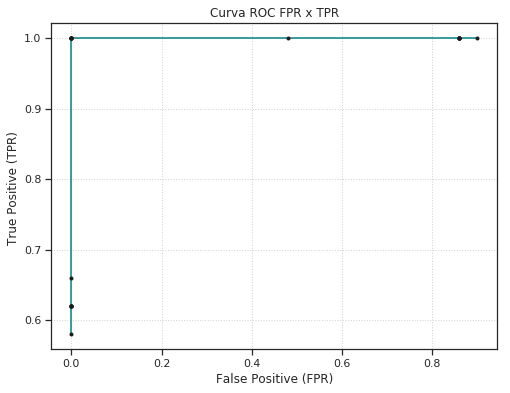

In [311]:
#Curva ROC
plt.plot( vFPR, vTPR , color='teal', linestyle = '-')
plt.plot( vFPR, vTPR , 'k.')

plt.title ("Curva ROC FPR x TPR")
plt.grid (linestyle = ':', color = 'lightgray', linewidth=1)
plt.xlabel ("False Positive (FPR)")
plt.ylabel ("True Positive (TPR) ")
plt.show()

###SVM

In [316]:
from sklearn import svm, datasets
Y = pd.get_dummies(R)
Y = Y[4]+Y[5] # Conferir se existem 6 colunas no atributo

X = A.values
X = X.reshape(-1,1)
y = Y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1)


#create the  Support Vector Classifier
clf = svm.SVC(gamma = 0.001, C = 100)


#train model
clf.fit(X_train, y_train)

#predict
y_pred = clf.predict(X_test)
y_true = y

print(y_pred)
print(y_true)
accuracy_score(y_test, y_pred)*100

[1 1 1 1 1 1 1 0 1 1]
[1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1
 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0]


70.0

##CLUSTERIZAÇÃO . K-means


In [0]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

Normalização - obrigatoria

In [0]:
#Normalizacao
from sklearn.preprocessing import StandardScaler
dados_norma = dados.iloc[:,:].values
dados_norma = StandardScaler().fit_transform(dados_norma)
dados_norma = pd.DataFrame(data = dados_norma, columns = colunas)
dados_norma.head()

###Preparação dos dados via PCA

In [0]:
#TUDO
pca = PCA(n_components=17)
principalComponents = pca.fit_transform(dados_norma)
PC_tudo = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17'])
print(pca.explained_variance_ratio_)

In [0]:
#PC2 = Morador = 93%
pca = PCA(n_components=7)
PC2 = dados_norma.iloc[:,5:14]
principalComponents = pca.fit_transform(PC2)
PC2 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
print(pca.explained_variance_ratio_)

In [0]:
#PC3 = Localizacao = 90%
pca = PCA(n_components=4)
PC3 = dados_norma.iloc[:,0:5]
principalComponents = pca.fit_transform(PC3)
PC3 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3','PC4'])
print(pca.explained_variance_ratio_)

In [0]:
#PC4 = Acustica = 90%
pca = PCA(n_components=3)
PC4 = dados_norma.iloc[:,14:18]
principalComponents = pca.fit_transform(PC4)
PC4 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])
print(pca.explained_variance_ratio_)

In [0]:
#PC5 = Temperatura = 100%
pca = PCA(n_components=2)
PC5 = dados_norma.iloc[:,18:20]
principalComponents = pca.fit_transform(PC5)
PC5 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
print(pca.explained_variance_ratio_)

In [0]:
#PC6 = Acessibilidade = 90%
pca = PCA(n_components=3)
PC6 = dados_norma.iloc[:,20:24]
principalComponents = pca.fit_transform(PC6)
PC6 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])
print(pca.explained_variance_ratio_)

In [0]:
#PC7 = Materiais = 100%
pca = PCA(n_components=2)
PC7 = dados_norma.iloc[:,24:26]
principalComponents = pca.fit_transform(PC7)
PC7 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
print(pca.explained_variance_ratio_)

In [0]:
#PC8 = Consumo = 100%
pca = PCA(n_components=3)
PC8 = dados_norma.iloc[:,26:29]
principalComponents = pca.fit_transform(PC8)
PC8 = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])
print(pca.explained_variance_ratio_)

In [0]:
PCtotal = pd.DataFrame(np.concatenate ((PC2, PC3, PC4, PC5, PC6, PC7, PC8), axis=1))

In [0]:
print("\n")
print("Graficando os dados em 2d")
plt.figure(1)
x_aux = np.linspace(-1,6,len(PC))#<<<<<<<<<<
x_aux.resize(len(PC),1) #<<<<<<<<

plt.scatter(principalComponents[:, 1], x_aux, color = 'darkorange', marker = '*')
plt.scatter(principalComponents[:,16], x_aux,  color = 'teal', marker = '+')
plt.xlabel('X')
plt.ylabel('y')
plt.title('GRAFICO')
plt.tight_layout()
plt.show()

### AGRUPAMENTO

In [0]:
#df = dados.iloc[:,0:29]
df = dados_norma
#df = PC_tudo
#df = PC8
#df = PCtotal

#Elbow Method
from sklearn.cluster import KMeans
wcss = []

for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'random') #A cada vez que rodar, será gerado um centroide diferente, com outros gráficos
    kmeans.fit(df)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 15), wcss)
#plt.title('O Metodo Elbow')
#plt.xlabel('Numero de Clusters')
#plt.ylabel('Distância média entre os pontos de dados e o centróide de seu cluster') #within cluster sum of squares
plt.show()

In [632]:
#modeling
clusterNum =8
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(df)
labels = k_means.labels_
print(labels)

[0 6 1 5 3 6 7 4 1 4 4 4 5 3 4 1 4 5 0 4 0 0 7 2 1 7 7 7 2 0 7 4 4 6 6 0 5
 5 6 3 3 4 6 1 6 1 3 7 0 1 4 7 3 1 7 4 4 1 1 1 6 1 1 4 1 1 5 0 1 0 5 0 5 0
 6 6 0 5 2 0 1 2 2 2 5 0 0 0 6 5 1 7 1 6]


In [0]:
#assing labels to each row in dataframe
df["Clus_lm"] = labels #mudar para a variável atual.
df.head()

In [0]:
#check centroid values by averaging the features in each cluster
cA= df.groupby('Clus_lm').mean()
cA.describe()

In [0]:
df.groupby('Clus_lm').last()

In [0]:
#gráfico 3D

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=110) #Se mudar a elev e azim, consegue 'rodar' o gráfico para uma posição melhor.

ax.scatter(df.iloc[:, 1], df.iloc[:, 0], df.iloc[:, 2],c= labels.astype(np.float)) 

In [0]:
'''
Visualizando os grupos

'''
#selecionando dados apenas do grupo 0
print('<<<<<< DADOS DO GRUPO 0 >>>>> \n', df.loc[(df['Clus_lm']) == 0], '\n')
print('<<<<<< DADOS DO GRUPO 1 >>>>> \n', df.loc[(df['Clus_lm']) == 1], '\n')
#print('<<<<<< DADOS DO GRUPO 2 >>>>> \n', df.loc[(df['Clus_lm']) == 2], '\n')
#print('<<<<<< DADOS DO GRUPO 3 >>>>> \n', df.loc[(df['Clus_lm']) == 3], '\n')
#print('<<<<<< DADOS DO GRUPO 3 >>>>> \n', df.loc[(df['Clus_lm']) == ], '\n')